# Libraries

In [1]:
import yfinance as yf

In [2]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt 

In [5]:
import numpy as np

In [6]:
import gradio as gr

C:\Users\keert\anaconda3\envs\myenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
from sklearn.model_selection import RandomizedSearchCV

## Data Collection

#### Independent variable - USD - INR

In [3]:
usd_inr = yf.download('USDINR=X', start='2024-01-01', end='2024-12-31', interval='1wk')

[*********************100%***********************]  1 of 1 completed


In [8]:
type(usd_inr)

pandas.core.frame.DataFrame

In [21]:
usd_inr.head()

Price,index,Date,Close,High,Low,Open,Volume
Ticker,,,USDINR=X,USDINR=X,USDINR=X,USDINR=X,USDINR=X
0,0,2024-01-01,83.240601,83.360298,83.035004,83.248596,0
1,1,2024-01-08,83.076103,83.189697,82.779099,83.191101,0
2,2,2024-01-15,83.160599,83.230797,82.809998,82.872101,0
3,3,2024-01-22,83.146103,83.222504,81.513702,83.124702,0
4,4,2024-01-29,82.927597,83.212601,82.815002,83.121300,0


In [19]:
usd_inr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   (Date, )            53 non-null     datetime64[ns]
 1   (Close, USDINR=X)   53 non-null     float64       
 2   (High, USDINR=X)    53 non-null     float64       
 3   (Low, USDINR=X)     53 non-null     float64       
 4   (Open, USDINR=X)    53 non-null     float64       
 5   (Volume, USDINR=X)  53 non-null     int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 2.6 KB


In [20]:
usd_inr.reset_index(inplace=True)

In [22]:
# Keep only relevant columns
usd_inr = usd_inr[['Date', 'Close']]
usd_inr.columns = ['Date', 'USD_INR']

In [23]:
usd_inr.head()

,Date,USD_INR
0,2024-01-01,83.240601
1,2024-01-08,83.076103
2,2024-01-15,83.160599
3,2024-01-22,83.146103
4,2024-01-29,82.927597


#### Dependent Variable y - Gold rate

In [25]:
gold_data_inr = yf.download('XAU', start='2024-01-01', end='2024-12-31', interval='1wk')

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['XAU']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1wk 2024-01-01 -> 2024-12-31)')


##### Web scraping using BeautifulSoup

In [28]:
# URL of the page
url = "https://www.exchange-rates.org/precious-metals/gold-price/india/2024"

# Send a request to fetch the page content
response = requests.get(url)

# Parse the HTML content
soup = BeautifulSoup(response.text, "html.parser")

# Find all tables
tables = soup.find_all("table")

# Extract tables into DataFrames
dfs = []
for table in tables:
    df = pd.read_html(str(table))[0]
    dfs.append(df)

# Print all extracted tables
# for i, df in enumerate(dfs):
#     print(f"Table {i+1}:")
#     print(df)
#     print("\n")

C:\Users\keert\AppData\Local\Temp\ipykernel_31220\1147665682.py:16: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
C:\Users\keert\AppData\Local\Temp\ipykernel_31220\1147665682.py:16: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
C:\Users\keert\AppData\Local\Temp\ipykernel_31220\1147665682.py:16: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
C:\Users\keert\AppData\Local\Temp\ipykernel_31220\1147665682.py:16: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read fr

In [8]:
gold_dataset = pd.read_csv("Gold vs USDINR.csv") 

In [9]:
gold_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      53 non-null     object 
 1   USD_INR   53 non-null     float64
 2   Goldrate  53 non-null     object 
dtypes: float64(1), object(2)
memory usage: 1.4+ KB


## Data Analysis

In [36]:
gold_dataset.head()

,Date,USD_INR,Goldrate
0,2024-01-01,83.240601,5066.31
1,2024-01-08,83.076103,4966.31
2,2024-01-15,83.160599,5015.33
3,2024-01-22,83.146103,4950.84
4,2024-01-29,82.927597,4976.77


In [11]:
gold_dataset['Goldrate'] = gold_dataset['Goldrate'].replace('₹', '', regex=True).replace(',','', regex=True).astype(float)

## EDA

- Handle missing values - No
- Handle Imbalanced dataset - No
- Handle outliers - Seen
- Encode categorical features - No
- Normalization vs Standardisation - standardize

<Axes: ylabel='USD_INR'>

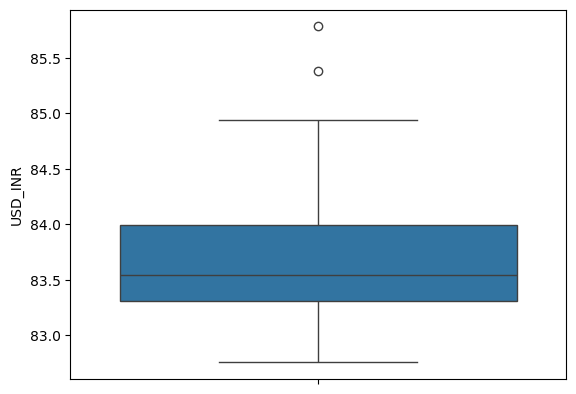

In [14]:
sns.boxplot(gold_dataset['USD_INR'])

In [17]:
gold_dataset['USD_INR'].min()

82.75229645

<Axes: xlabel='USD_INR', ylabel='Goldrate'>

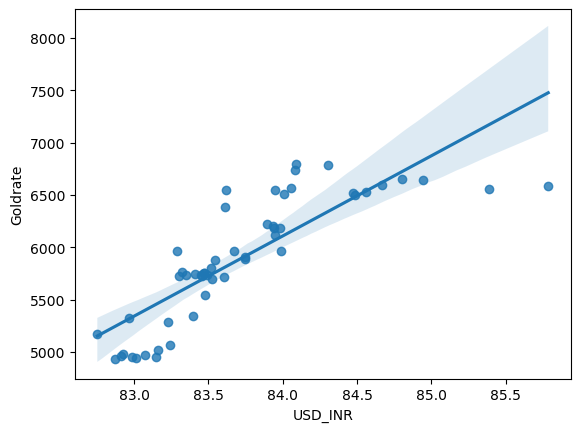

In [18]:
sns.regplot(x='USD_INR', y='Goldrate', data=gold_dataset)

## Model Training

In [35]:
X = gold_dataset[['USD_INR']]
y = gold_dataset[['Goldrate']]

In [27]:
X

0     83.240601
1     83.076103
2     83.160599
3     83.146103
4     82.927597
5     82.985298
6     83.009598
7     82.872299
8     82.910400
9     82.752296
10    82.965599
11    83.226601
12    83.392998
13    83.477798
14    83.349297
15    83.544998
16    83.301804
17    83.406303
18    83.459396
19    83.470100
20    83.286400
21    83.320900
22    83.473099
23    83.522102
24    83.601601
25    83.450897
26    83.493401
27    83.518501
28    83.674301
29    83.744400
30    83.743896
31    83.988998
32    83.948303
33    83.940598
34    83.895103
35    83.983597
36    83.934799
37    83.614700
38    83.617104
39    84.009399
40    83.945999
41    84.053802
42    84.081802
43    84.091499
44    84.306396
45    84.473801
46    84.488297
47    84.556999
48    84.666000
49    84.802002
50    84.945000
51    85.386002
52    85.786598
Name: USD_INR, dtype: float64

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)

In [32]:
X_train.shape, X_test.shape

((47,), (6,))

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [39]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
X_test_scaled

array([[-0.37619593],
       [ 0.53097266],
       [ 1.31302272],
       [-0.49602609],
       [ 0.58955971],
       [-1.12965796]])

In [41]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [42]:
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [43]:
regressor.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [44]:
regressor.coef_

array([[469.20755762]])

In [45]:
regressor.intercept_

array([5878.57340426])

In [50]:
# y = mx+b
m = regressor.coef_[0][0]
b = regressor.intercept_[0]

In [51]:
m,b

(469.2075576153299, 5878.573404255313)

In [56]:
x_train_predict = regressor.predict(X_train_scaled)

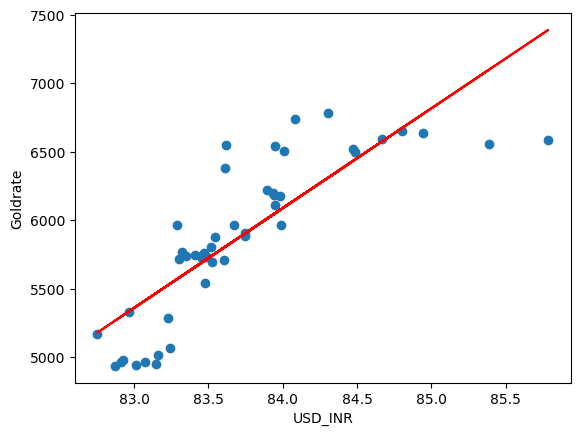

In [57]:
plt.scatter(X_train,y_train)
plt.plot(X_train, x_train_predict, color='r')
plt.xlabel("USD_INR")
plt.ylabel("Goldrate")

plt.show()

In [58]:
X_test_predicted = regressor.predict(X_test_scaled)

In [59]:
X_test_predicted

array([[5702.05943009],
       [6127.70978702],
       [6494.65358787],
       [5645.83421639],
       [6155.1992781 ],
       [5348.52935023]])

In [60]:
y_test

,Goldrate
19,5754.39
41,6563.33
47,6524.06
12,5341.21
43,6795.35
5,4953.90


In [62]:
from sklearn.metrics import mean_squared_error

In [63]:
mean_squared_error(y_test, X_test_predicted)

141948.22993388725

## Hyperparameter optimization

In [65]:
from sklearn.model_selection import RandomizedSearchCV
param_space = {'copy_X': [True,False], 
               'fit_intercept': [True,False], 
               'n_jobs': [1,5,10,15,None], 
               'positive': [True,False]}

In [67]:
search = RandomizedSearchCV(regressor, param_space, n_iter=50, cv=5)

In [74]:
search.fit(X_train_scaled, y_train)

C:\Users\keert\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 40 is smaller than n_iter=50. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=LinearRegression(), n_iter=50,
                   param_distributions={'copy_X': [True, False],
                                        'fit_intercept': [True, False],
                                        'n_jobs': [1, 5, 10, 15, None],
                                        'positive': [True, False]})

In [75]:
search.best_params_

{'positive': True, 'n_jobs': 1, 'fit_intercept': True, 'copy_X': True}

In [76]:
tuned_model = LinearRegression(positive= True, n_jobs= 1, fit_intercept= True, copy_X= True)

In [77]:
tuned_model.fit(X_train_scaled, y_train)

LinearRegression(n_jobs=1, positive=True)

In [78]:
tuned_model.coef_

array([[469.20755762]])

In [79]:
tuned_model.intercept_

array([5878.57340426])